In [16]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [17]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [18]:
X_train.shape

(35000, 32, 32, 3)

In [19]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [20]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [ ]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

In [ ]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [ ]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

sources - https://machinelearning.wtf/terms/internal-covariate-shift/
          https://machinelearning.wtf/terms/batch-normalization/
          https://arxiv.org/abs/1502.03167
          https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
          ChatGPT

Answer:Training neural networks for many layers (like > 10) can be problematic as they can be sensitive to intial random weights and complex learning algorithms. one such technicality the model may
face is:

INTERNAL COVARIATE SHIFT : In a neural network, while propagating through the layers, the distribution of inputs alters owing to the changes in the parameters of the preceding layers. To avoid this
technicality we can try lowering the learning rates and carefully intializing the parameters but this would be quite troublesome as it slows down the model and also makes it hard to train the model.
Thus, we adopt Batch normalization technique to address these changes in the distribution of layer inputs, i.e, internal covariate shift.

BATCH NORMALIZATION : We use this method to, basically, integrate normalization into the model architechure, i.e, to make the model perform normalization to each training mini batch. Its job is to
ensure that evey layer of the neural network has a mean close to 0 and a standard deviation close to 1. For doing so, it normalizes the values within a mini batch using their mean and standard
deviation, normalized values are then scaled and shifted by learnable parameters which allows the model to learn the optimal scale and variance for each feature.

While reducing the internal covariate shift, batch normalizaiton keeps no constrains on the learning rates and parameters being initialized. Hence it stabilizes the learning process, allows for fast
convergence and enables use of higher learning rates. Apart from this, batch normalizes also has few more benefits to offer. It also acts as a regularizer, in some cases eliminating the need for
Dropout.It introduces noise to the network by normalizing the inputs for every batch. This noise has a similar effect to dropout, which helps to prevent overfitting and improve generalization. It helps
even in terms of optimization as it allows usage of higher (aggressive) learning rates which consequently, can accelerate the convergence of the network.

Moreover batch normalization can also prevent problems like vanishing or exploding gradient descents. By maintaining stable mean and standard deviation values for the inputs, it keeps the gradients
wihtin a meaningful range. Hence, Batch normalization resolves many issues and is a major breakthrough for the internal covariate shift.

"""

In [ ]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

In [ ]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.BatchNormalization(input_shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.summary()

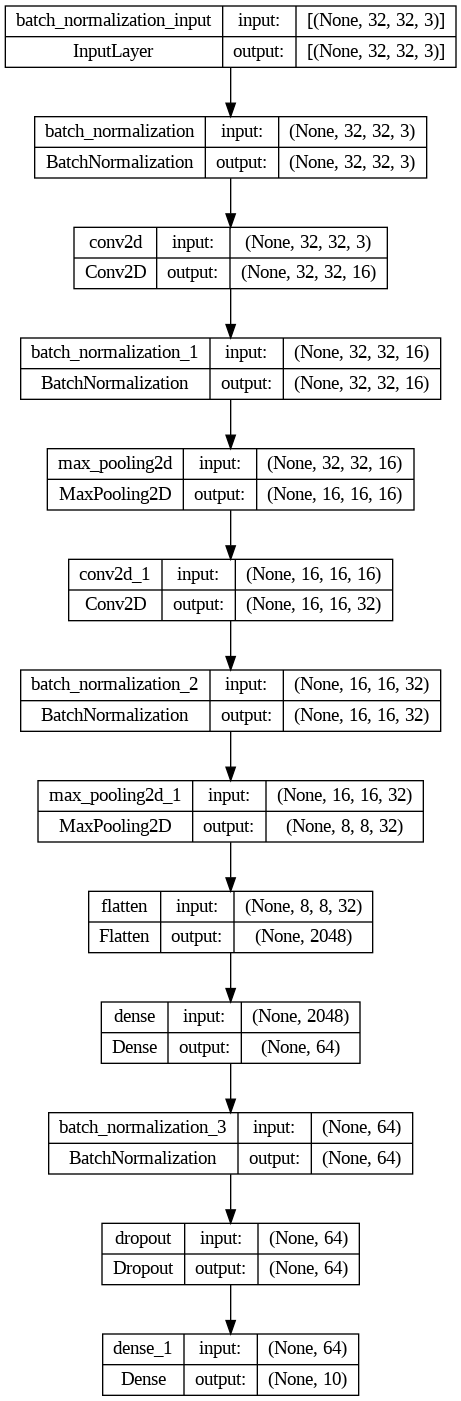

In [21]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

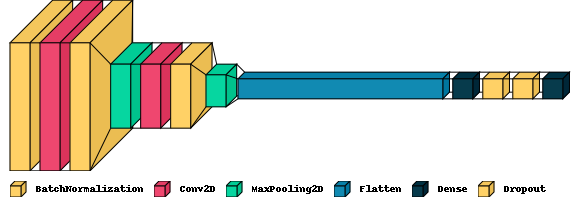

In [24]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [ ]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [23]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 44s 40ms/step - loss: 1.5102 - accuracy: 0.0986 - val_loss: 1.4519 - val_accuracy: 0.0661
Epoch 2/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.4887 - accuracy: 0.0981 - val_loss: 1.4142 - val_accuracy: 0.0861
Epoch 3/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.4705 - accuracy: 0.0996 - val_loss: 1.3780 - val_accuracy: 0.1079
Epoch 4/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.4621 - accuracy: 0.0988 - val_loss: 1.3580 - val_accuracy: 0.0973
Epoch 5/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.4592 - accuracy: 0.0989 - val_loss: 1.3976 - val_accuracy: 0.1011
Epoch 6/10
1094/1094 [==============================] - 43s 40ms/step - loss: 1.4408 - accuracy: 0.0986 - val_loss: 1.3577 - val_accuracy: 0.0964
Epoch 7/10
1094/1094 [==============================] - 41s 38ms/step - loss: 1.4299 - accuracy: 0.1006 - val_loss: 1.3508 -

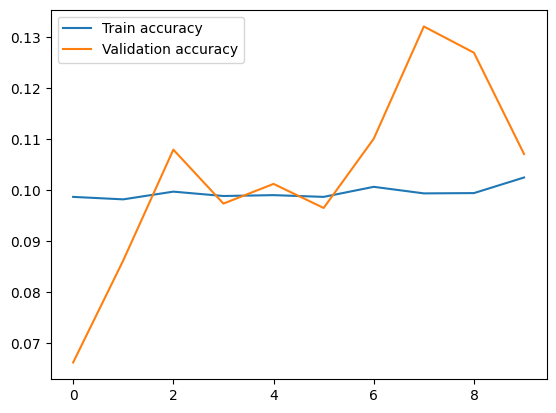

In [27]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [28]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 1.3168 - accuracy: 0.1091


[1.316813588142395, 0.1090666651725769]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [26]:
# model initialization
model2 = tf.keras.Sequential()

# Intermediate layers
model2.add(tf.keras.layers.BatchNormalization(input_shape=(32, 32, 3)))

model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model2.add(tf.keras.layers.Dropout(0.5))

# final layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [30]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

history2 = model2.fit(augmented_images, epochs=5,validation_data = validation_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 34s 29ms/step - loss: 2.1302 - accuracy: 0.1052 - val_loss: 1.7828 - val_accuracy: 0.0804
Epoch 2/5
1094/1094 [==============================] - 34s 31ms/step - loss: 1.8942 - accuracy: 0.0947 - val_loss: 1.7228 - val_accuracy: 0.0987
Epoch 3/5
1094/1094 [==============================] - 39s 35ms/step - loss: 1.8514 - accuracy: 0.0919 - val_loss: 1.6701 - val_accuracy: 0.1111
Epoch 4/5
1094/1094 [==============================] - 32s 29ms/step - loss: 1.8271 - accuracy: 0.0906 - val_loss: 1.6439 - val_accuracy: 0.0960
Epoch 5/5
1094/1094 [==============================] - 29s 27ms/step - loss: 1.8008 - accuracy: 0.0928 - val_loss: 1.6487 - val_accuracy: 0.1500


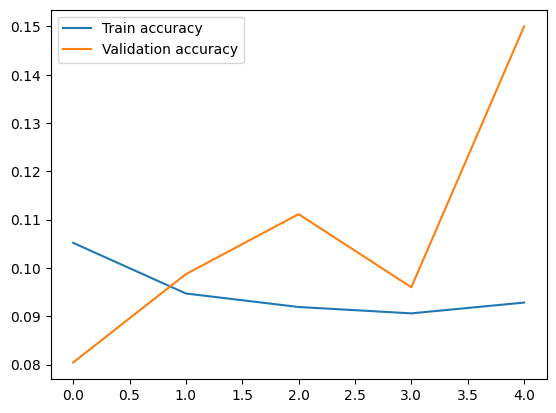

In [34]:
plt.plot(history2.history['accuracy'],label="Train accuracy")
plt.plot(history2.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [37]:
# model initialization
model3 = tf.keras.Sequential()

# Intermediate layers
model3.add(tf.keras.layers.BatchNormalization(input_shape=(32, 32, 3)))

model3.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D())

model3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D())

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model3.add(tf.keras.layers.Dropout(0.5))

# final layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [38]:
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

history = model3.fit(augmented_images, epochs=5,validation_data = validation_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 32s 27ms/step - loss: 2.4024 - accuracy: 0.0997 - val_loss: 2.0974 - val_accuracy: 0.2150
Epoch 2/5
1094/1094 [==============================] - 28s 26ms/step - loss: 2.2501 - accuracy: 0.1025 - val_loss: 2.0693 - val_accuracy: 0.1721
Epoch 3/5
1094/1094 [==============================] - 34s 31ms/step - loss: 2.2232 - accuracy: 0.1029 - val_loss: 2.0373 - val_accuracy: 0.0237
Epoch 4/5
1094/1094 [==============================] - 29s 27ms/step - loss: 2.2018 - accuracy: 0.1047 - val_loss: 2.0790 - val_accuracy: 0.1369
Epoch 5/5
1094/1094 [==============================] - 33s 30ms/step - loss: 2.1892 - accuracy: 0.1024 - val_loss: 2.0479 - val_accuracy: 0.0880


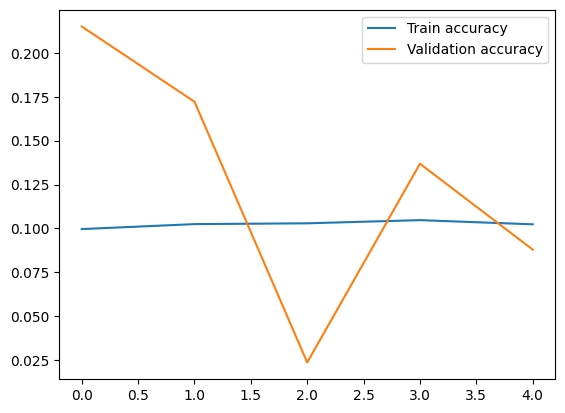

In [39]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [41]:
# model initialization
model4 = tf.keras.Sequential()

# Intermediate layers
model4.add(tf.keras.layers.BatchNormalization(input_shape=(32, 32, 3)))

model4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(tf.keras.layers.Dropout(0.2))

model4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(tf.keras.layers.Dropout(0.2))

model4.add(tf.keras.layers.Flatten())

model4.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.5))

# final layer
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

In [42]:
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

history = model4.fit(augmented_images, epochs=5,validation_data = validation_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 35s 28ms/step - loss: 2.6980 - accuracy: 0.0978 - val_loss: 2.9183 - val_accuracy: 0.0746
Epoch 2/5
1094/1094 [==============================] - 31s 28ms/step - loss: 2.5127 - accuracy: 0.1009 - val_loss: 2.3520 - val_accuracy: 0.0653
Epoch 3/5
1094/1094 [==============================] - 35s 32ms/step - loss: 2.4205 - accuracy: 0.0983 - val_loss: 2.2702 - val_accuracy: 0.0919
Epoch 4/5
1094/1094 [==============================] - 30s 28ms/step - loss: 2.4197 - accuracy: 0.0956 - val_loss: 2.2240 - val_accuracy: 0.0866
Epoch 5/5
1094/1094 [==============================] - 30s 28ms/step - loss: 2.5001 - accuracy: 0.1004 - val_loss: 2.8506 - val_accuracy: 0.0077


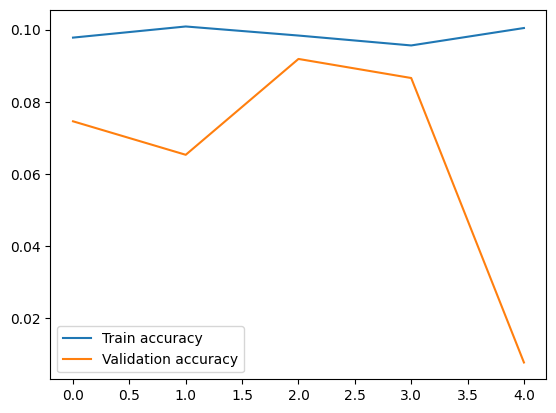

In [43]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()